In [1]:
# 4 train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at 4 line only
four_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('4')]

In [5]:
# look at all station names
four_train_all['STATION'].unique()

array(['125 ST', '138/GRAND CONC', '14 ST-UNION SQ', '149/GRAND CONC',
       '161/YANKEE STAD', '167 ST', '170 ST', '176 ST', '183 ST', '59 ST',
       '86 ST', 'ATL AV-BARCLAY', 'BEDFORD PK BLVD', 'BOROUGH HALL',
       'BOTANIC GARDEN', 'BOWLING GREEN', 'BROOKLYN BRIDGE',
       'BURNSIDE AV', 'CHAMBERS ST', 'CROWN HTS-UTICA', 'FORDHAM RD',
       'FRANKLIN AV', 'FULTON ST', 'GRD CNTRL-42 ST', 'KINGSBRIDGE RD',
       'MOSHOLU PKWY', 'MT EDEN AV', 'NEVINS ST', 'WALL ST', 'WOODLAWN'],
      dtype=object)

In [6]:
# check station count
four_train_all['STATION'].count()

36

In [8]:
# needs further cleaning
four_train_all["STATION"].replace("CHAMBERS ST", value="BROOKLYN BRIDGE", inplace=True)
four_train_all["STATION"].replace("BOTANIC GARDEN", value="FRANKLIN AV", inplace=True)

In [9]:
# now sum same name rows
four_commuters = four_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
four_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
125 ST,20342.0,18847.0
138/GRAND CONC,2015.0,1298.0
14 ST-UNION SQ,17962.0,48134.0
149/GRAND CONC,4322.0,2052.0
161/YANKEE STAD,17163.0,3074.0


In [10]:
# order stations in excel
# save as csv
four_commuters.to_csv('four_commuters.csv')

In [11]:
# open ordered CSV
csv_path_4 = 'four_commuters_order.csv'
four_commuters_order = pd.read_csv(csv_path_4, encoding="utf-8")
four_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,WOODLAWN,6346,313
1,MOSHOLU PKWY,10642,1228
2,BEDFORD PK BLVD,3550,1016
3,KINGSBRIDGE RD,12464,2142
4,FORDHAM RD,7053,501


In [12]:
four_commuters_order['AM_AVG_ENTER'] = four_commuters_order['AM_ENTERS']/5

In [13]:
four_commuters_order['AM_AVG_EXIT'] = four_commuters_order['AM_EXITS']/5
four_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,WOODLAWN,6346,313,1269.2,62.6
1,MOSHOLU PKWY,10642,1228,2128.4,245.6
2,BEDFORD PK BLVD,3550,1016,710.0,203.2
3,KINGSBRIDGE RD,12464,2142,2492.8,428.4
4,FORDHAM RD,7053,501,1410.6,100.2


In [14]:
# order stations in excel
# save as csv
four_commuters_order.to_csv('four_commuters_final.csv')

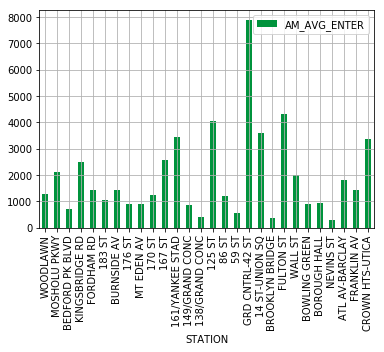

In [15]:
# graph 4 Train AM AVG ENTERS
plt = four_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('4-AM-enter.pdf')

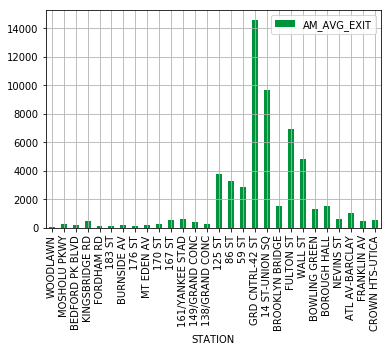

In [16]:
# graph 4 Train AM AVG EXITS
plt = four_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('4-AM-exit.pdf')